In [1]:
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np

# Classifying Digits with K-Nearest-Neighbors (KNN)

This is a very simple implementation of classifying images using the k-nearest-neighbors algorithm. The accuracy is pretty good for how simple the algorithm is. The parameters can be tinkered with but at the time of writing I am using k = 5, training data size = 10000, testing data size = 1000. Let's set these parameters, read in the data, then view one of the images and the label associated with it. Afterwards I'll explain the algorithm. 

In [2]:
k = 5
batch_size_train = 10000
batch_size_test = 1000

In [3]:
train_mnist = torchvision.datasets.MNIST('C:/projects/summer2020/vision/digits/', train=True, download=True,
                        transform=torchvision.transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(train_mnist, batch_size=batch_size_train, shuffle=True)

test_mnist = torchvision.datasets.MNIST('C:/projects/summer2020/vision/digits/', train=False, download=True,
                        transform=torchvision.transforms.ToTensor())
test_loader = torch.utils.data.DataLoader(test_mnist,batch_size=batch_size_test, shuffle=True)

In [4]:
train_set = enumerate(train_loader)
_, (train_imgs, train_targets) = next(train_set)
test_set = enumerate(test_loader)
_, (test_imgs, test_targets) = next(test_set)

([], <a list of 0 Text yticklabel objects>)

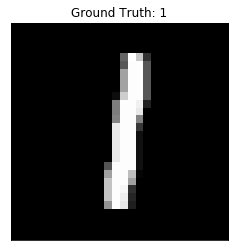

In [5]:
plt.imshow(train_imgs[0][0], cmap='gray', interpolation='none')
plt.title("Ground Truth: {}".format(train_targets[0]))
plt.xticks([])
plt.yticks([])

The k-nearest-neighbors algorithm is not very efficient and my implementation is even less efficient. I was aiming for simplicity over efficiency. We loop through each test image and find the distance to every training image. Distance is measured as Euclidean (p=2). We take the k nearest images and record the ground truth digit corresponding with the image. The predicted label is based on the majority of labels from k nearest images. The majority I chose to use is the median. It is very basic in that it is the central value/label. The effectiveness of this method of majority depends on our value of k. We compare the prediction with the ground truth of the test set which produces our prediction accuracy.

In [6]:
n_test = test_imgs.shape[0]
n_train = train_imgs.shape[0]
pred_test_targets = torch.zeros_like(test_targets)
for i in range(n_test):
    test_img = test_imgs[i]
    distances = [torch.dist(test_img, train_imgs[j], p=2) for j in range(n_train)]
    nearest_indices = np.array(distances).argsort()[:5]
    pred_test_targets[i] = train_targets[nearest_indices].median()

In [7]:
accuracy = np.divide(sum(pred_test_targets == test_targets), len(test_targets))
print('Prediction accuracy: {}'.format(accuracy))

Prediction accuracy: 0.959
